In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T00:06:51.132331+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": 8,
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.4903261661529541}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003979682922363281}
!!! {"init_...": 0.0008015632629394531}
!!! {"ete3Tree": 0.692070722579956}
!!! {"GenomeTree_hierarchical": 0.0022270679473876953}
!!! {"mutateBranchETEhierarchy": 0.09341692924499512}
!!! {"write_genome_short": 0.04714465141296387}


  4%|▍         | 8/193 [00:03<00:54,  3.38it/s]

!!! {"writeGenomeNoIndels": 0.1693115234375}
!!! {"pl.DataFrame": 0.043219804763793945}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0576951503753662}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01735067367553711}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033719539642333984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001366138458251953}
!!! {"init_...": 0.0004680156707763672}
!!! {"ete3Tree": 7.700920104980469e-05}
!!! {"GenomeTree_hierarchical": 0.0021648406982421875}
!!! {"mutateBranchETEhierarchy": 1.4781951904296875e-05}
!!! {"write_genome_short": 6.914138793945312e-0

  8%|▊         | 15/193 [00:03<00:24,  7.25it/s]

!!! {"phastSimRun": 0.00011014938354492188}
!!! {"init_...": 0.0005934238433837891}
!!! {"ete3Tree": 7.009506225585938e-05}
!!! {"GenomeTree_hierarchical": 0.0021452903747558594}
!!! {"mutateBranchETEhierarchy": 1.2159347534179688e-05}
!!! {"write_genome_short": 8.106231689453125e-05}
!!! {"writeGenomeNoIndels": 1.0251998901367188e-05}
!!! {"pl.DataFrame": 8.058547973632812e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005141019821166992}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022029876708984375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=166, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003422975540161133}
enter log_context_duration fo

 13%|█▎        | 26/193 [00:03<00:11, 14.49it/s]

!!! {"GenomeTree_hierarchical": 0.0029380321502685547}
!!! {"mutateBranchETEhierarchy": 0.004592180252075195}
!!! {"write_genome_short": 0.0032896995544433594}
!!! {"writeGenomeNoIndels": 0.007726192474365234}
!!! {"pl.DataFrame": 0.0015113353729248047}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04205012321472168}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009224414825439453}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031604766845703125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011968612670898438}
!!! {"init_...": 0.00043845176696777344}
!!! {"ete3Tree": 6.5326690

 21%|██        | 40/193 [00:03<00:05, 26.83it/s]

!!! {"phastSimRun": 0.00010204315185546875}
!!! {"init_...": 0.0005915164947509766}
!!! {"ete3Tree": 6.0558319091796875e-05}
!!! {"GenomeTree_hierarchical": 0.0020923614501953125}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.365776062011719e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.033348083496094e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005030155181884766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018334388732910156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003167390823364258}
enter log_context_duration fo

 24%|██▍       | 46/193 [00:03<00:04, 29.79it/s]

!!! {"ete3Tree": 0.022248029708862305}
!!! {"GenomeTree_hierarchical": 0.0021407604217529297}
!!! {"mutateBranchETEhierarchy": 0.0048370361328125}
!!! {"write_genome_short": 0.002624034881591797}
!!! {"writeGenomeNoIndels": 0.008632898330688477}
!!! {"pl.DataFrame": 0.0016608238220214844}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.044531822204589844}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0010254383087158203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032188892364501953}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001392364501953125}
!!! {"init_...": 0.0004854202270

 31%|███       | 59/193 [00:04<00:03, 40.37it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003707408905029297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012421607971191406}
!!! {"init_...": 0.0004532337188720703}
!!! {"ete3Tree": 9.1552734375e-05}
!!! {"GenomeTree_hierarchical": 0.0025382041931152344}
!!! {"mutateBranchETEhierarchy": 1.621246337890625e-05}
!!! {"write_genome_short": 8.153915405273438e-05}
!!! {"writeGenomeNoIndels": 2.2411346435546875e-05}
!!! {"pl.DataFrame": 0.00010132789611816406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005324602127075195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025153160095214844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=37, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_n

 38%|███▊      | 73/193 [00:04<00:02, 49.39it/s]

!!! {"phastSimRun": 0.00011968612670898438}
!!! {"init_...": 0.0004329681396484375}
!!! {"ete3Tree": 0.00015282630920410156}
!!! {"GenomeTree_hierarchical": 0.002156496047973633}
!!! {"mutateBranchETEhierarchy": 2.956390380859375e-05}
!!! {"write_genome_short": 0.00010251998901367188}
!!! {"writeGenomeNoIndels": 4.029273986816406e-05}
!!! {"pl.DataFrame": 7.987022399902344e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0058553218841552734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018477439880371094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032057762145996094}
enter log_context_duration for

 41%|████      | 79/193 [00:04<00:02, 48.09it/s]

!!! {"init_...": 0.0007688999176025391}
!!! {"ete3Tree": 0.00017714500427246094}
!!! {"GenomeTree_hierarchical": 0.003091573715209961}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 0.0002961158752441406}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.0001354217529296875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006319284439086914}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025391578674316406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=1235, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005204916000366211}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00

 47%|████▋     | 90/193 [00:04<00:02, 39.00it/s]

!!! {"write_genome_short": 0.0030066967010498047}
!!! {"writeGenomeNoIndels": 0.00837564468383789}
!!! {"pl.DataFrame": 0.0016064643859863281}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04317951202392578}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009670257568359375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033369064331054688}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001556873321533203}
!!! {"init_...": 0.00046515464782714844}
!!! {"ete3Tree": 0.00019884109497070312}
!!! {"GenomeTree_hierarchical": 0.0021889209747314453}
!!! {"mutateBranchETEhierarchy": 3.74317169

 50%|█████     | 97/193 [00:05<00:02, 44.38it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003438711166381836}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015664100646972656}
!!! {"init_...": 0.0004799365997314453}
!!! {"ete3Tree": 9.72747802734375e-05}
!!! {"GenomeTree_hierarchical": 0.0022306442260742188}
!!! {"mutateBranchETEhierarchy": 1.7642974853515625e-05}
!!! {"write_genome_short": 7.82012939453125e-05}
!!! {"writeGenomeNoIndels": 1.621246337890625e-05}
!!! {"pl.DataFrame": 9.322166442871094e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004822254180908203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002388

 56%|█████▋    | 109/193 [00:05<00:01, 45.96it/s]

!!! {"writeGenomeNoIndels": 0.006723880767822266}
!!! {"pl.DataFrame": 0.0009300708770751953}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0345761775970459}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006985664367675781}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=13, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033028125762939453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013709068298339844}
!!! {"init_...": 0.00047016143798828125}
!!! {"ete3Tree": 0.0001468658447265625}
!!! {"GenomeTree_hierarchical": 0.002178668975830078}
!!! {"mutateBranchETEhierarchy": 2.6941299438476562e-05}
!!! {"write_genome_short": 8.201599

 63%|██████▎   | 122/193 [00:05<00:01, 50.63it/s]

!!! {"phastSimRun": 0.00010633468627929688}
!!! {"init_...": 0.0005412101745605469}
!!! {"ete3Tree": 6.890296936035156e-05}
!!! {"GenomeTree_hierarchical": 0.0021295547485351562}
!!! {"mutateBranchETEhierarchy": 1.2159347534179688e-05}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 7.43865966796875e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005063772201538086}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017642974853515625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003232717514038086}
enter log_context_duration for _d

 66%|██████▋   | 128/193 [00:05<00:01, 52.00it/s]

!!! {"write_genome_short": 0.0005667209625244141}
!!! {"writeGenomeNoIndels": 1.4543533325195312e-05}
!!! {"pl.DataFrame": 7.390975952148438e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005980491638183594}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000179290771484375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=825, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0043621063232421875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010085105895996094}
!!! {"init_...": 0.00043511390686035156}
!!! {"ete3Tree": 0.004731178283691406}
!!! {"GenomeTree_hierarchical": 0.001981973648071289}
!!! {"mutateBranchETEhierarchy": 0.0011

 73%|███████▎  | 141/193 [00:05<00:00, 55.39it/s]

!!! {"init_...": 0.0008227825164794922}
!!! {"ete3Tree": 0.0002186298370361328}
!!! {"GenomeTree_hierarchical": 0.0022916793823242188}
!!! {"mutateBranchETEhierarchy": 1.33514404296875e-05}
!!! {"write_genome_short": 0.00029850006103515625}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 0.00012683868408203125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005734920501708984}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00032067298889160156}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032491683959960938}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00

 76%|███████▌  | 147/193 [00:06<00:00, 47.18it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=4595, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.010481595993041992}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014543533325195312}
!!! {"init_...": 0.0004999637603759766}
!!! {"ete3Tree": 0.027776241302490234}
!!! {"GenomeTree_hierarchical": 0.002153635025024414}
!!! {"mutateBranchETEhierarchy": 0.006975650787353516}
!!! {"write_genome_short": 0.0032804012298583984}
!!! {"writeGenomeNoIndels": 0.011216402053833008}
!!! {"pl.DataFrame": 0.0027205944061279297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05682659149169922}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00126361

 81%|████████▏ | 157/193 [00:06<00:00, 42.14it/s]

!!! {"phastSimRun": 0.000408172607421875}
!!! {"init_...": 0.0006623268127441406}
!!! {"ete3Tree": 0.00016951560974121094}
!!! {"GenomeTree_hierarchical": 0.0026786327362060547}
!!! {"mutateBranchETEhierarchy": 1.9311904907226562e-05}
!!! {"write_genome_short": 0.0002319812774658203}
!!! {"writeGenomeNoIndels": 1.4781951904296875e-05}
!!! {"pl.DataFrame": 0.00011920928955078125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006077766418457031}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002887248992919922}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003278493881225586}
enter log_context_duration for 

 86%|████████▌ | 166/193 [00:07<00:02, 11.94it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003737926483154297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012946128845214844}
!!! {"init_...": 0.000476837158203125}
!!! {"ete3Tree": 7.748603820800781e-05}
!!! {"GenomeTree_hierarchical": 0.0022499561309814453}
!!! {"mutateBranchETEhierarchy": 1.4543533325195312e-05}
!!! {"write_genome_short": 8.344650268554688e-05}
!!! {"writeGenomeNoIndels": 1.1682510375976562e-05}
!!! {"pl.DataFrame": 8.940696716308594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0053179264068603516}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021076202392578125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_

 89%|████████▊ | 171/193 [00:08<00:01, 13.65it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=11125, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.019773006439208984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014591217041015625}
!!! {"init_...": 0.0005016326904296875}
!!! {"ete3Tree": 0.06368494033813477}
!!! {"GenomeTree_hierarchical": 0.0021915435791015625}
!!! {"mutateBranchETEhierarchy": 0.015314340591430664}
!!! {"write_genome_short": 0.007641315460205078}
!!! {"writeGenomeNoIndels": 0.024883270263671875}
!!! {"pl.DataFrame": 0.004675149917602539}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12114262580871582}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00247478485

 94%|█████████▍| 182/193 [00:08<00:00, 22.37it/s]

!!! {"write_genome_short": 0.0005159378051757812}
!!! {"writeGenomeNoIndels": 7.867813110351562e-06}
!!! {"pl.DataFrame": 8.58306884765625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0053157806396484375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002105236053466797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032465457916259766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011396408081054688}
!!! {"init_...": 0.00042438507080078125}
!!! {"ete3Tree": 6.222724914550781e-05}
!!! {"GenomeTree_hierarchical": 0.0022459030151367188}
!!! {"mutateBranchETEhierarchy": 1.09672

 97%|█████████▋| 187/193 [00:08<00:00, 24.32it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036551952362060547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013375282287597656}
!!! {"init_...": 0.0004420280456542969}
!!! {"ete3Tree": 0.00020813941955566406}
!!! {"GenomeTree_hierarchical": 0.0022096633911132812}
!!! {"mutateBranchETEhierarchy": 4.220008850097656e-05}
!!! {"write_genome_short": 8.702278137207031e-05}
!!! {"writeGenomeNoIndels": 5.817413330078125e-05}
!!! {"pl.DataFrame": 0.00010251998901367188}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005660295486450195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002574920654296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=6, len(ancestral_sequence)=390
enter log_context_duration for alifestd_a

100%|██████████| 193/193 [00:08<00:00, 22.33it/s]


enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=15, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035314559936523438}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012683868408203125}
!!! {"init_...": 0.0004374980926513672}
!!! {"ete3Tree": 0.0001704692840576172}
!!! {"GenomeTree_hierarchical": 0.0021386146545410156}
!!! {"mutateBranchETEhierarchy": 3.075599670410156e-05}
!!! {"write_genome_short": 8.034706115722656e-05}
!!! {"writeGenomeNoIndels": 3.981590270996094e-05}
!!! {"pl.DataFrame": 9.250640869140625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005359649658203125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002

  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024590492248535156}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03343391418457031}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0021088123321533203}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0026824474334716797}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03920292854309082}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0031213760375976562}
enter log_context_duration for seq

 43%|████▎     | 3/7 [00:00<00:00, 21.88it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.0335237979888916}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003622293472290039}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0026688575744628906}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03328227996826172}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035371780395507812}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002721071243286133}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatc

100%|██████████| 7/7 [00:00<00:00, 23.28it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.0029115676879882812}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0030405521392822266}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03349947929382324}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035867691040039062}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015420913696289062}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020957231521606445}
enter log_context_duration for res.collect
exit log_context_duration for res.

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2547950744628906}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': 8,
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 3751/3751 [00:25<00:00, 147.09it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.05156970024109}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 3751/3751 [00:04<00:00, 920.67it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 118.01669359207153}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.05920100212097168}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 181.41909790039062}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008910179138183594}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003414154052734375}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00044226646423339844}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004146099090576172}
ancestral


100%|██████████| 368/368 [00:00<00:00, 285675.34it/s]

process mutations:   0%|          | 1/368 [00:00<01:15,  4.89it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:15<11:40,  1.94s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.5s



process mutations:  13%|█▎        | 48/368 [00:53<05:46,  1.08s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   58.3s



process mutations:  24%|██▍       | 88/368 [01:32<04:44,  1.02s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.6min



process mutations:  35%|███▍      | 128/368 [02:12<04:03,  1.02s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.3min



process mutations:  46%|████▌     | 168/368 [02:53<03:22,  1.01s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.0min



process mutations:  57%|█████▋    | 208/368 [03:32<02:40,  1.00s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.7min



process mutations:  67%|██████▋   | 248/368 [04:11<01:58,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.4min



process mutations:  78%|███████▊  | 288/368 [04:52<01:20,  1.01s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.0min



process mutations:  89%|████████▉ | 328/368 [05:31<00:39,  1.00it/s]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  5.7min



process mutations: 100%|██████████| 368/368 [06:14<00:00,  1.02s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.2min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.3min finished


process replicate: 100%|██████████| 1/1 [09:28<00:00, 568.14s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.0849299430847168}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 109
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'fb5eec66-0cf4-84b4-a487-5ebafea1d473', 'fb5eec66-0cf4-84b4-a487-5ebafea1d473', 'fb5eec66-0cf4-84b4-a487-5ebafe
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ phylo_df_background_len        <u16> 7287, 7388, 7286, 7388, 6272
$ phyo_df_screened_len           <u16> 215, 114, 216, 114, 1230
$ tb_stat                        <cat> clade duration ratio, clade duration ratio, 

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


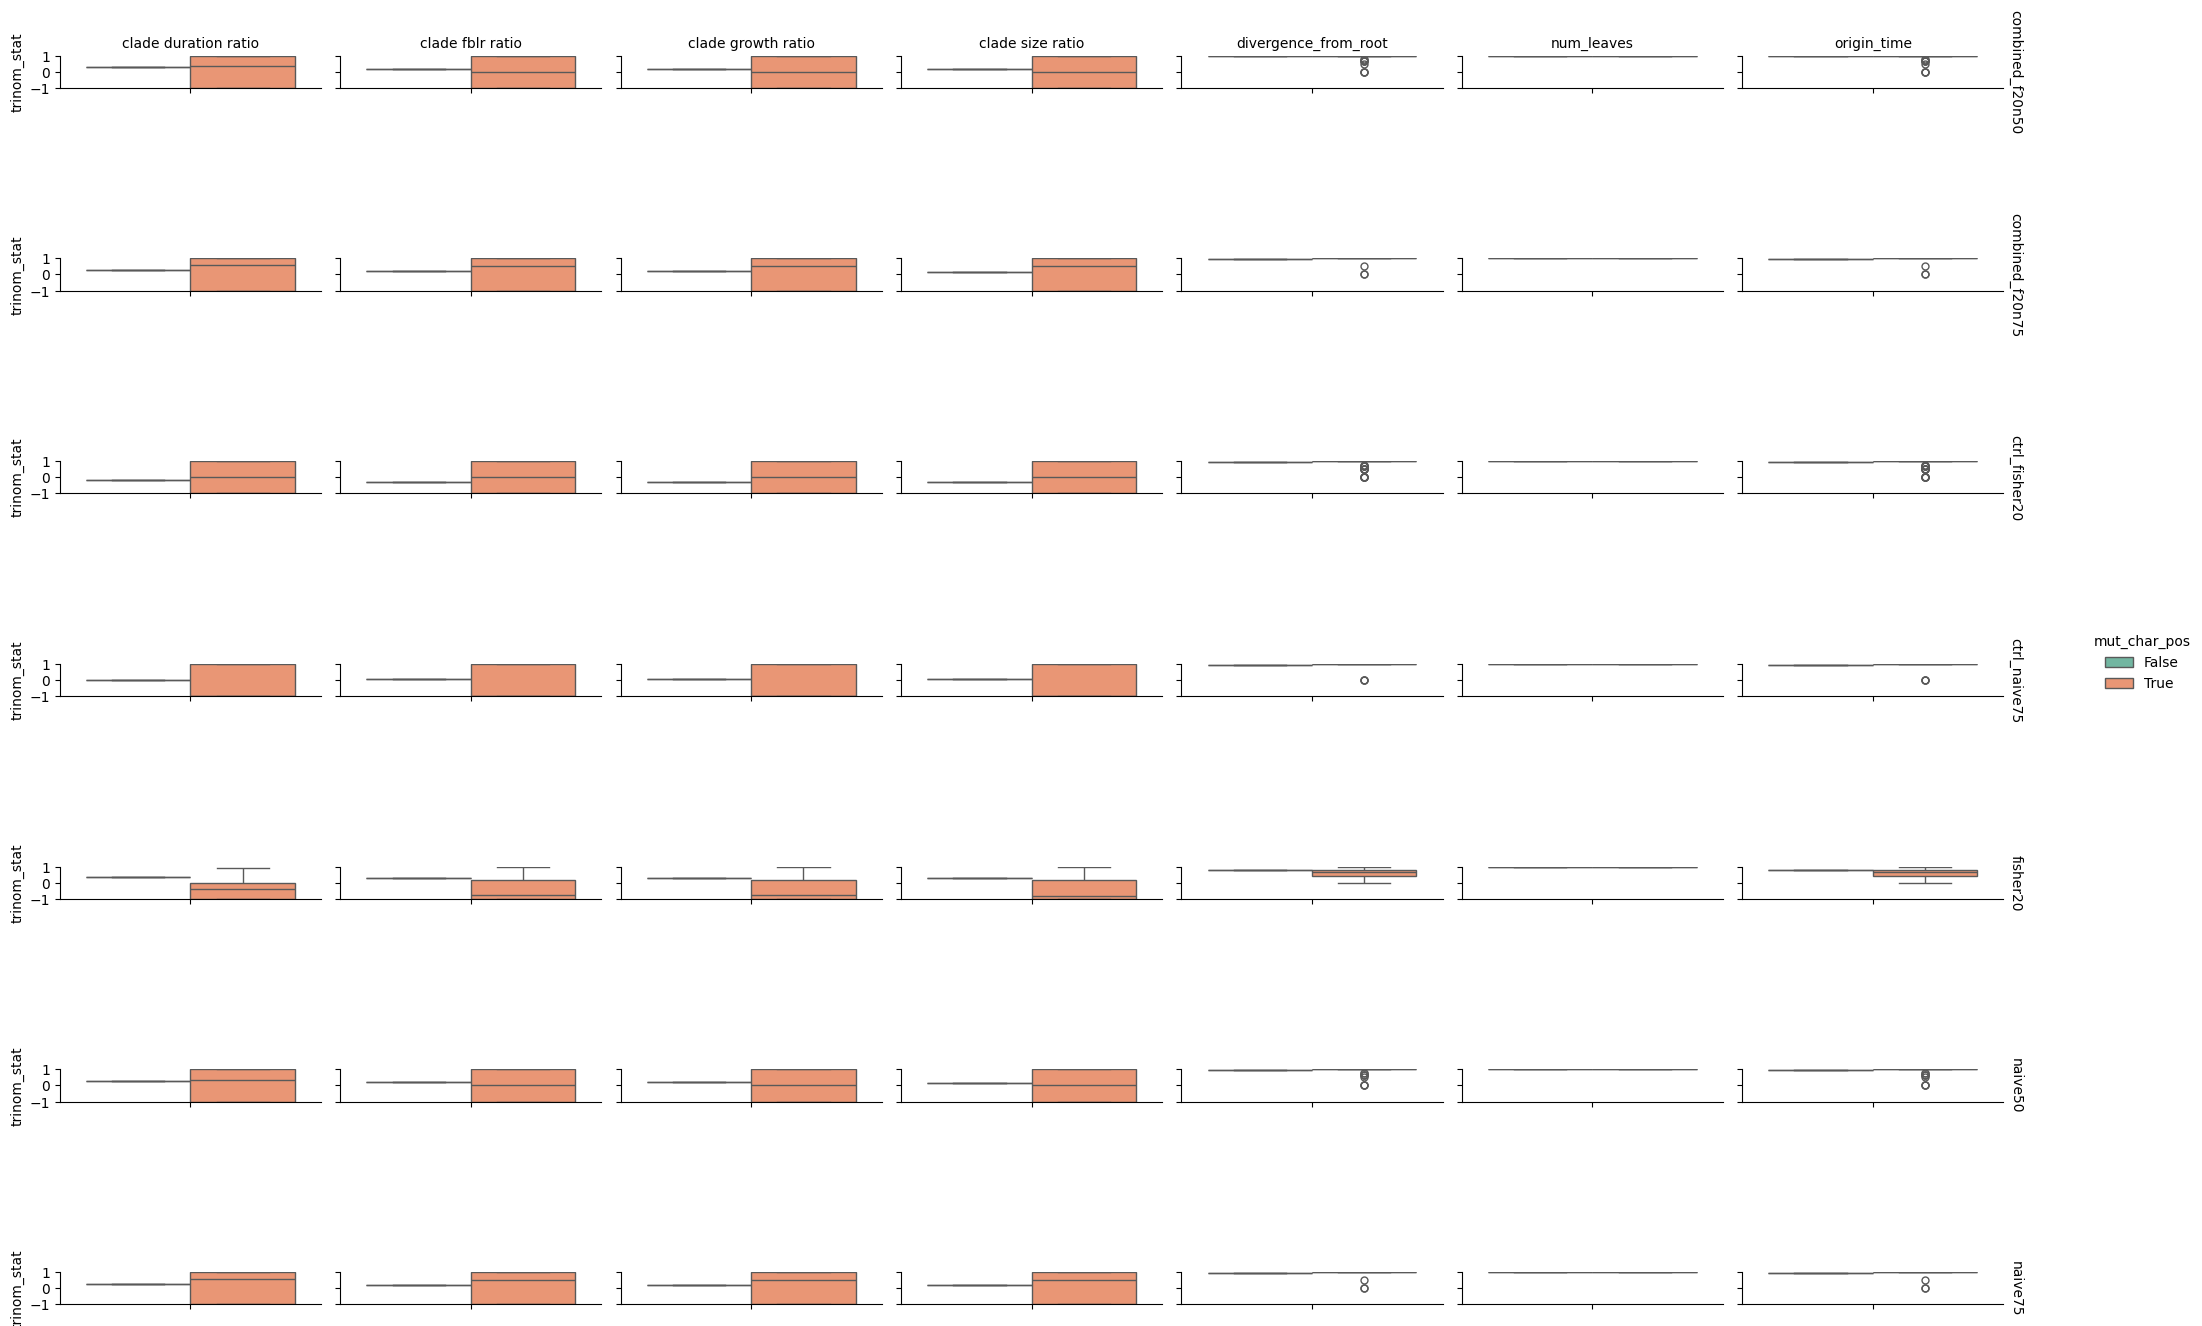

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


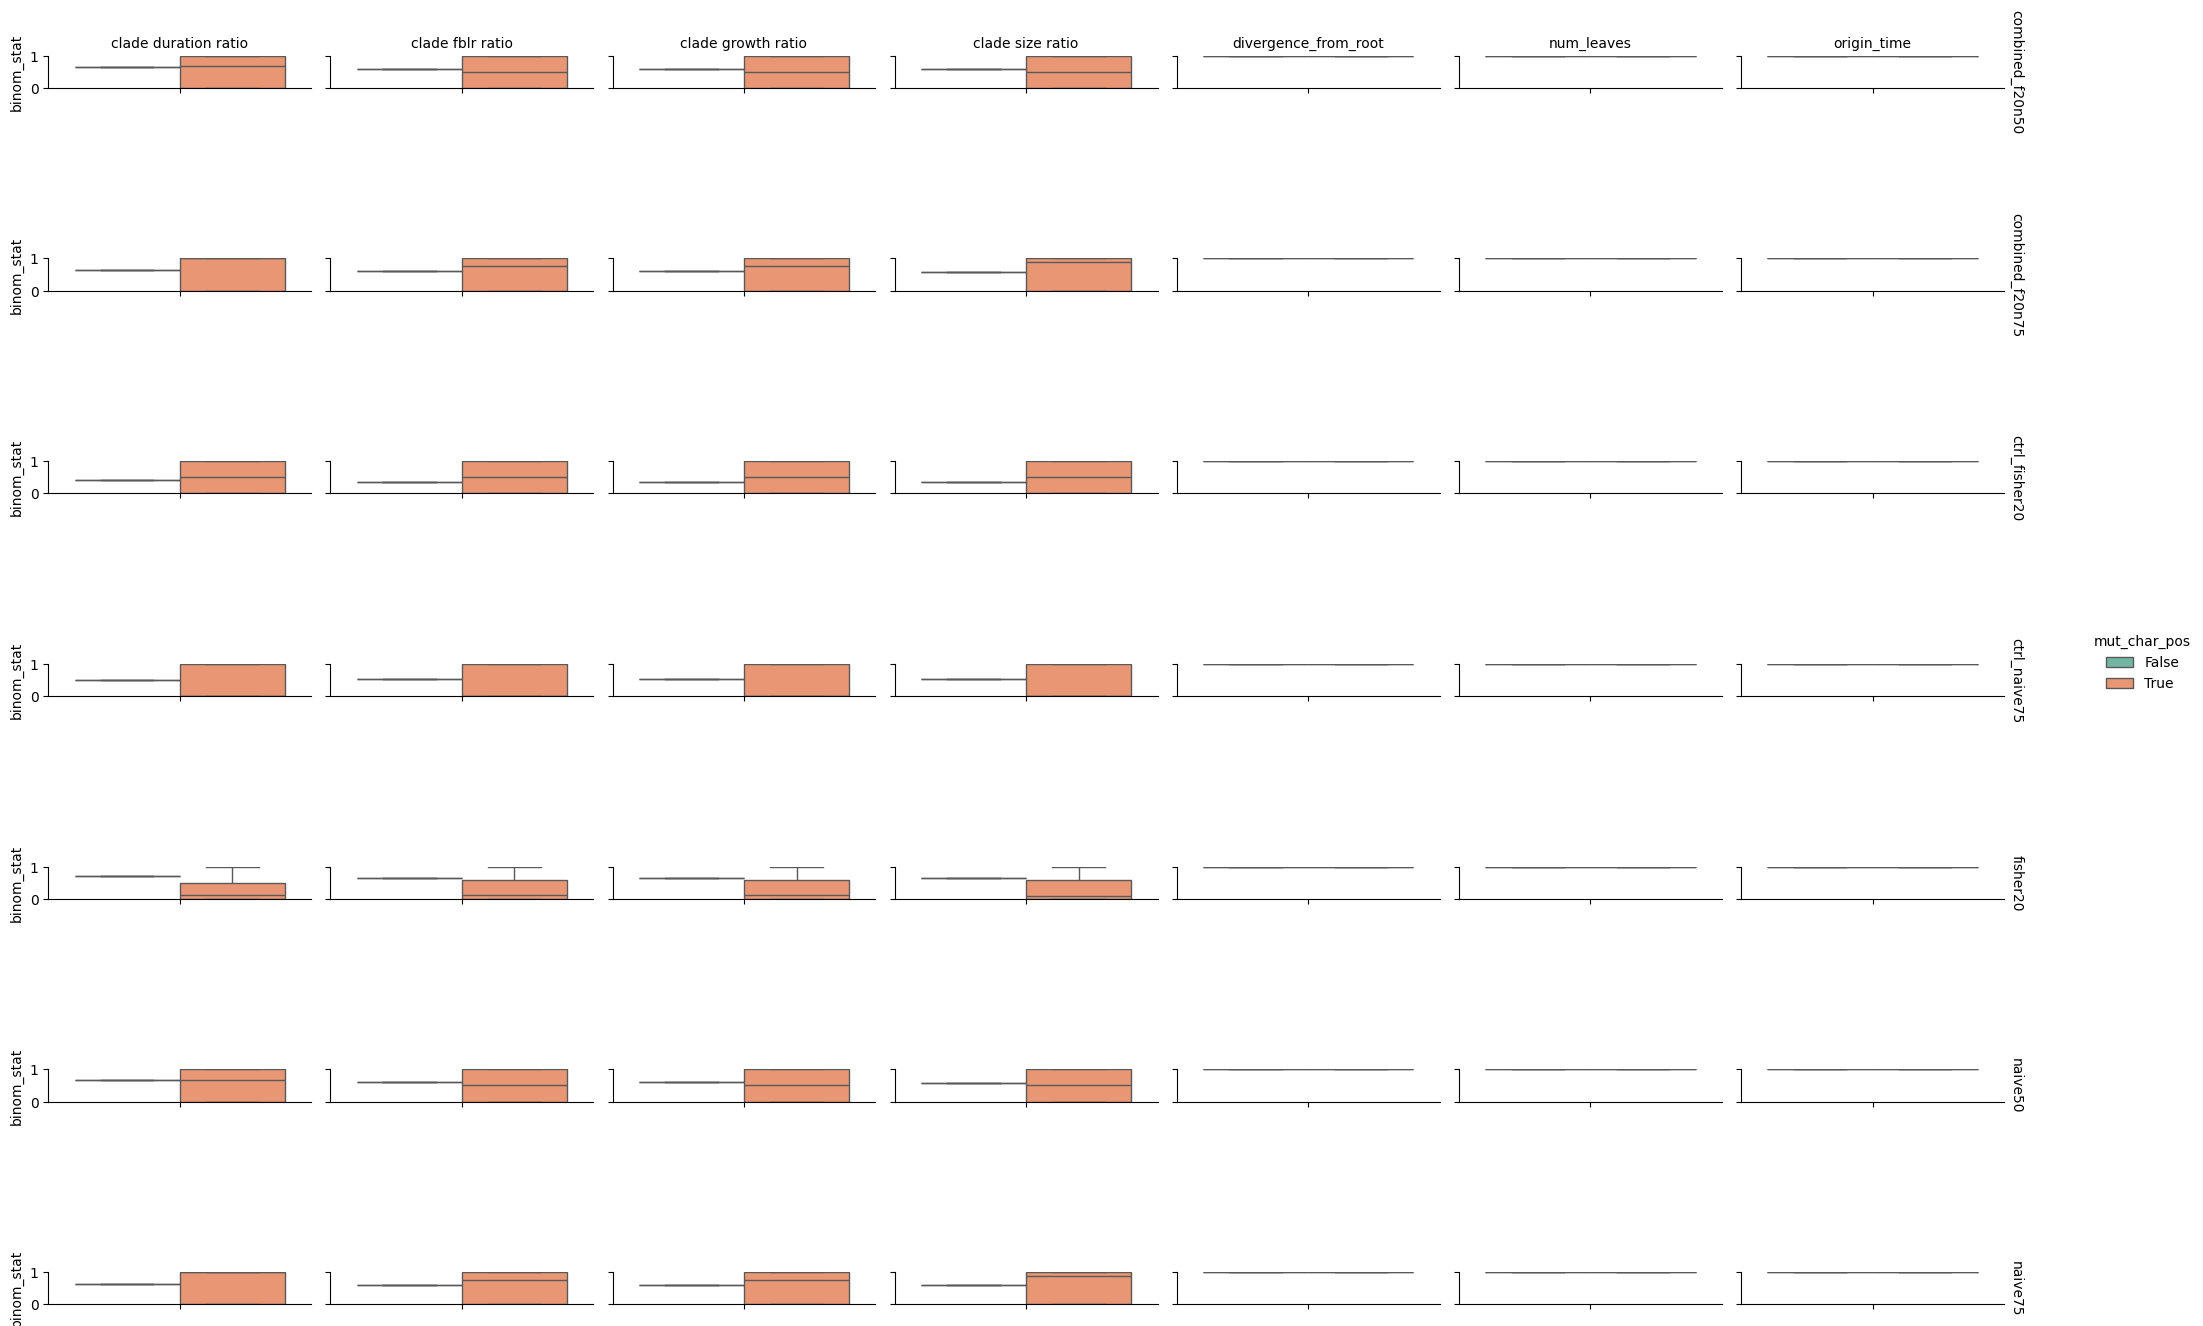

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


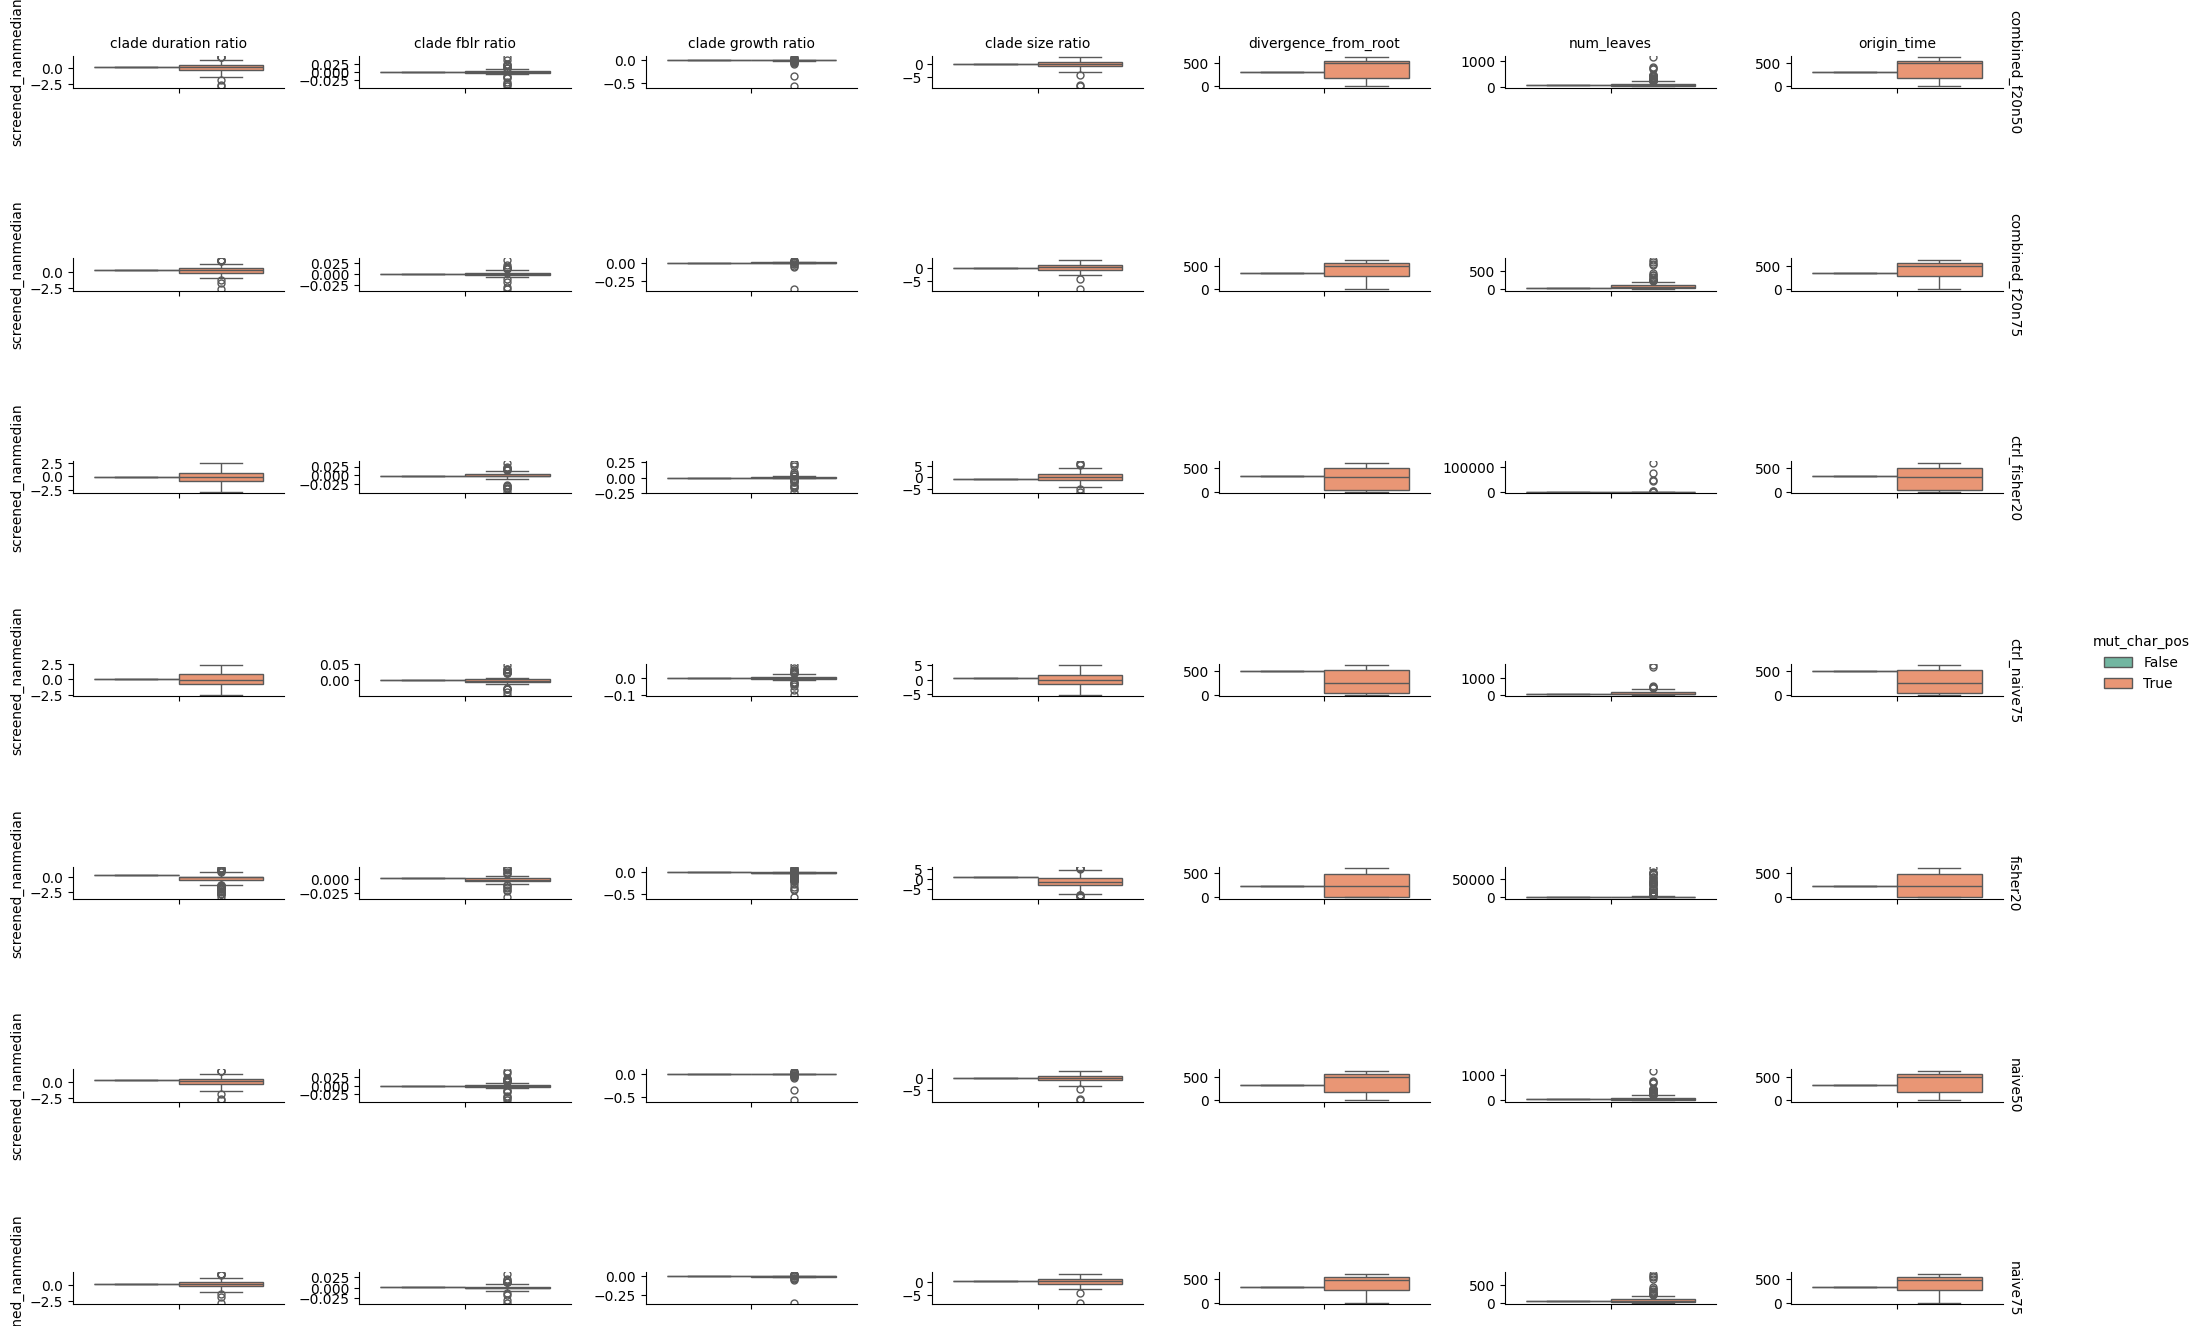

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


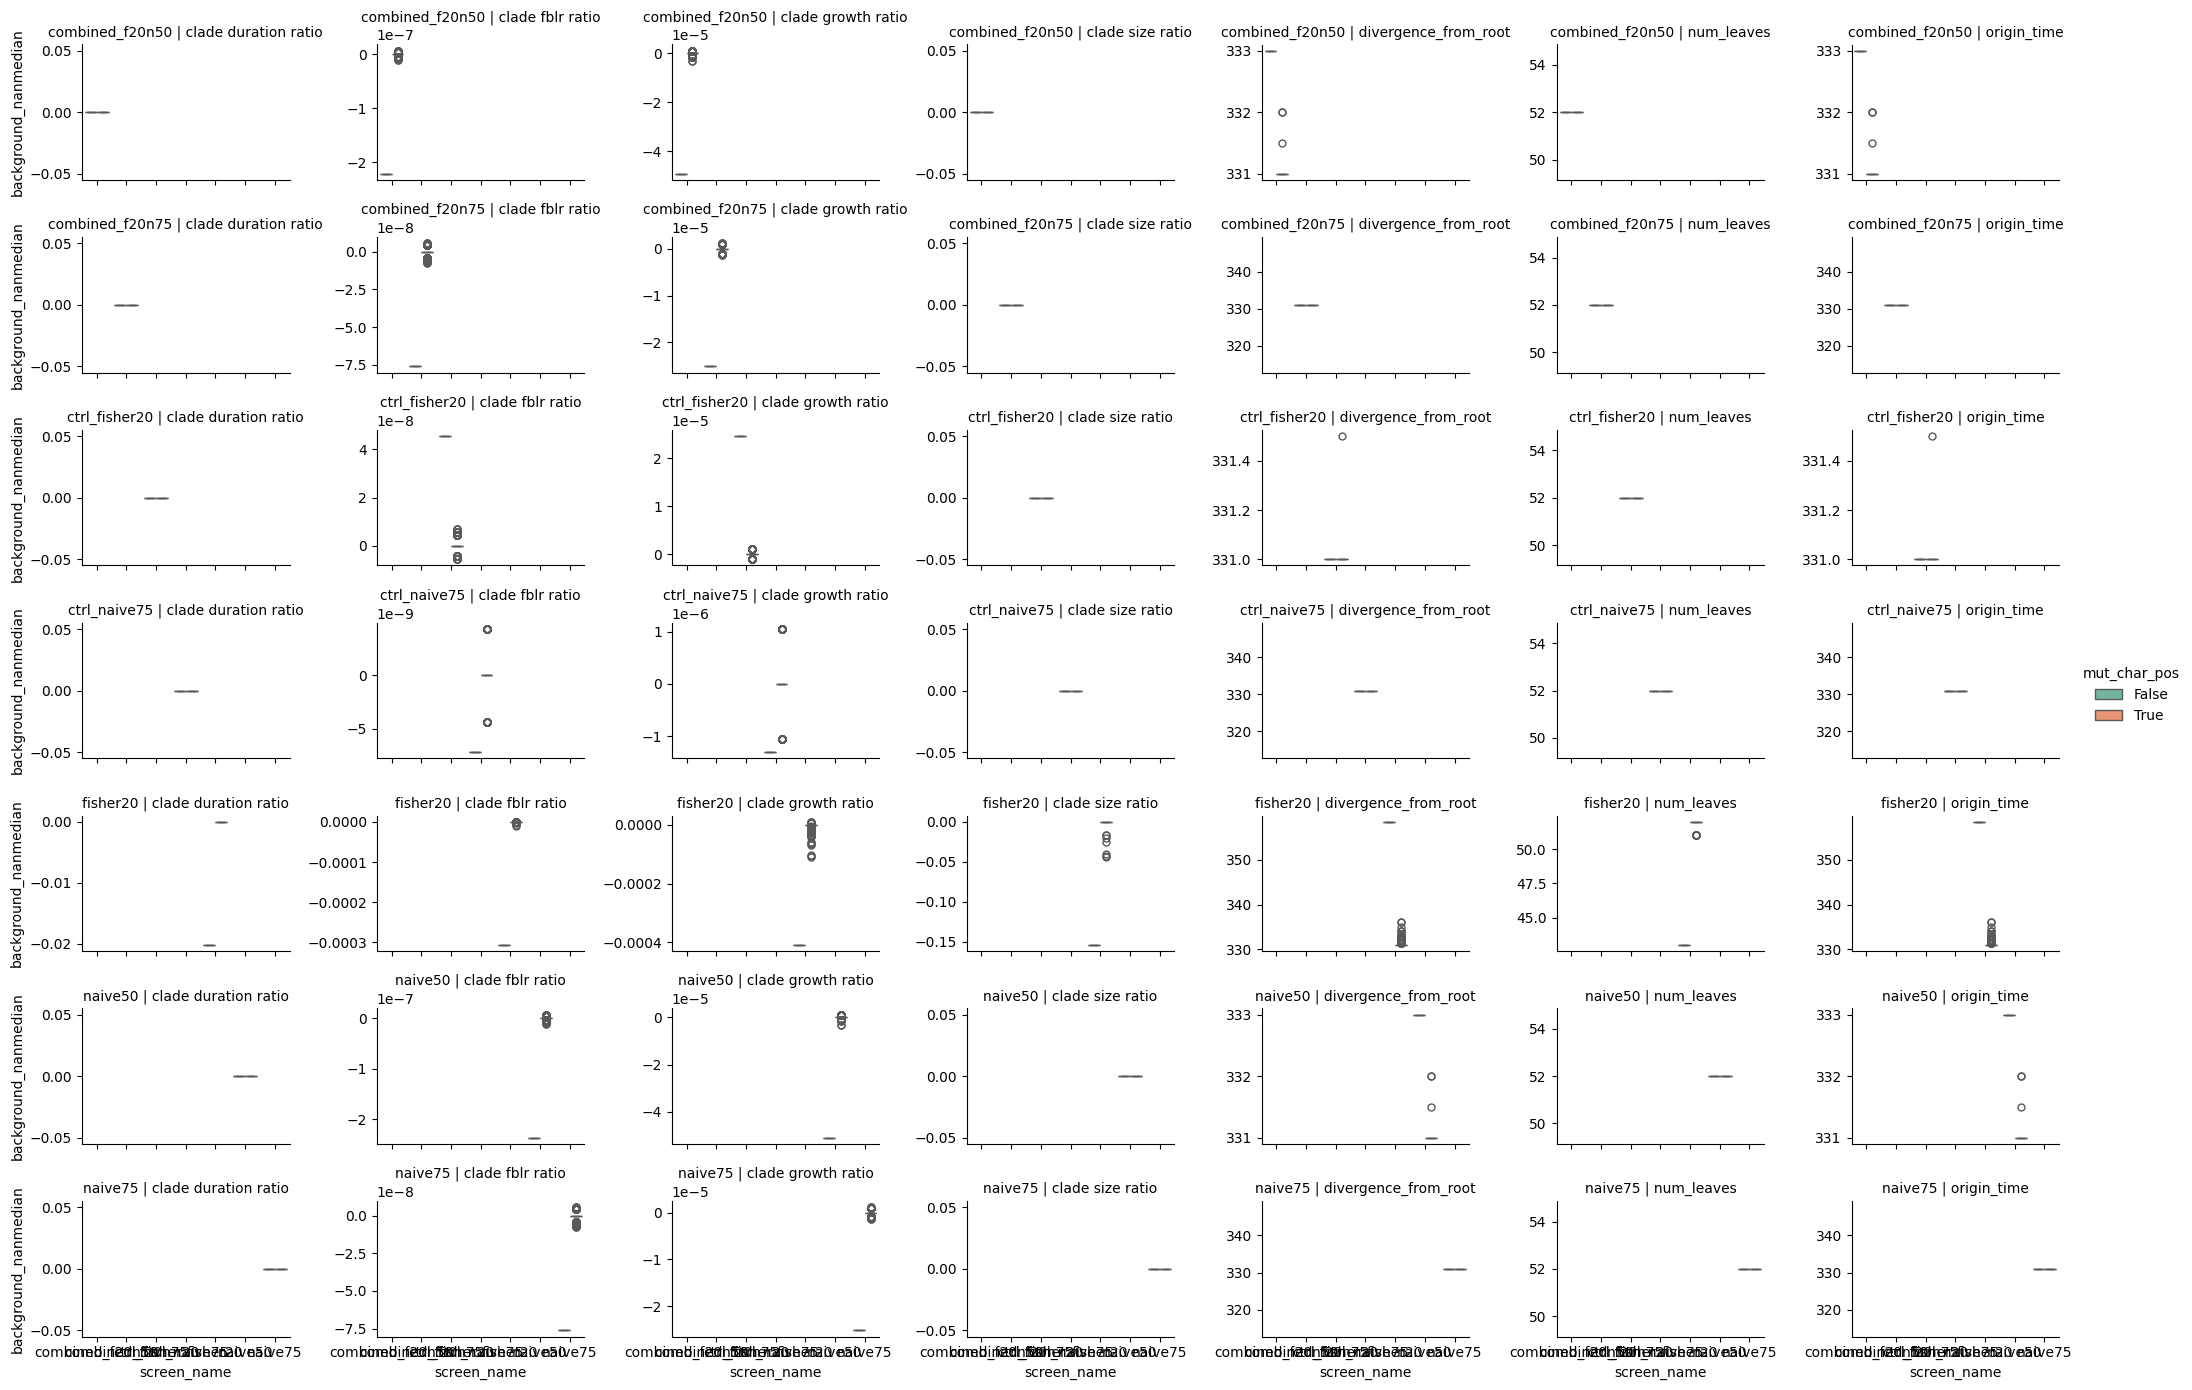

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
